<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Выбор модели</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "БАЯНДИН" # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>-</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-</b>, вторая неделя и далее до конца модуля <b>-</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [176]:
#0) Подключение библиотек
from os import getcwd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<p>1. Загрузка исходных данных</p>

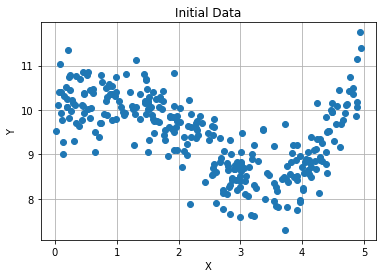

In [177]:
df = pd.read_csv("data/A2_Model_Selection/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()
x = x.reshape(-1,1)

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [178]:
from sklearn.model_selection import train_test_split,KFold
# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

kf = KFold(n_splits=4, shuffle=True, random_state=0)


<p>3. Обучение</p>

In [179]:
# LinearRegression с нормализацией X

# Для способов 1 и 2

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

# Ваш код

def modify(data,degree):
    return PolynomialFeatures(degree).fit_transform(data)

def getmodel(degree,x,y,model,modify_to_degree=False):
    mod1 = model(normalize =True)
    mod1.fit(PolynomialFeatures(degree).fit_transform(x), y)
    return mod1

def cross_val(degree,init=False):
    res = []
    model = None
#     print(x.shape)
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
#         print(X_train.shape)
        model = getmodel(degree,X_train,Y_train,LinearRegression)
        mse_test = mean_squared_error(Y_test,model.predict(modify(X_test,degree)))
        mse_train = mean_squared_error(Y_train,model.predict(modify(X_train,degree)))
        r2_test = r2_score(Y_test,model.predict(modify(X_test,degree)))
        r2_train = r2_score(Y_train,model.predict(modify(X_train,degree)))
        res.append((mse_test,mse_train,r2_test,r2_train))
    return np.mean(res,axis=0).tolist(),(np.std(res,axis=0)[0]),model

def classic(degree,init=False):
    res = []
    model = getmodel(degree,x_train,y_train,LinearRegression)
#     print(x_train.shape)
    mse_test = mean_squared_error(y_test,model.predict(modify(x_test,degree)))
    mse_train = mean_squared_error(y_train,model.predict(modify(x_train,degree)))
    r2_test = r2_score(y_test,model.predict(modify(x_test,degree)))
    r2_train = r2_score(y_train,model.predict(modify(x_train,degree)))
    res.append((mse_test,mse_train,r2_test,r2_train))
    return [mse_test,mse_train,r2_test,r2_train],model

In [180]:
cross_val(3)
# classic(3)

([0.23750283676574616,
  0.2297029519438707,
  0.6698067223790567,
  0.6817647152231884],
 0.009051758372465926,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))

LEARN CV

In [181]:
cross_val_res = []
for i in range(17):
    cross_val_res.append(list(cross_val(i)[0])+[cross_val(i)[1]])
res_df = pd.DataFrame(cross_val_res,columns=["mse_test","mse_train","r2_test","r2_train",'std'])


In [182]:
res_df.head(4)

,mse_test,mse_train,r2_test,r2_train,std
0,0.722820,0.722026,-0.002156,0.000000,0.029263
1,0.566466,0.557991,0.218179,0.227576,0.088570
2,0.445275,0.431522,0.382087,0.402310,0.033804
3,0.237503,0.229703,0.669807,0.681765,0.009052


LEARN CLASSIC

In [183]:
classic_val_res = []
for i in range(17):
    classic_val_res.append(classic(i)[0])

classic_df = pd.DataFrame(classic_val_res,columns=["mse_test","mse_train","r2_test","r2_train"])


In [184]:
classic_df

,mse_test,mse_train,r2_test,r2_train
0,0.770567,0.691284,-0.000216,0.000000
1,0.688708,0.482865,0.106039,0.301495
2,0.491635,0.386902,0.361845,0.440315
3,0.235041,0.238175,0.694910,0.655460
4,0.237220,0.238041,0.692082,0.655654
5,0.236970,0.235142,0.692407,0.659848
6,0.237767,0.234788,0.691373,0.660360
7,0.252531,0.232965,0.672208,0.662996
8,0.267498,0.226369,0.652781,0.672539
9,0.279444,0.225499,0.637274,0.673797


<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

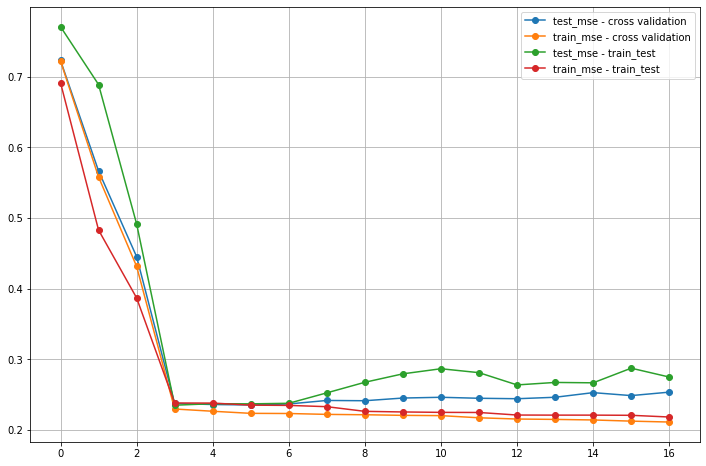

In [185]:
# Для способов 1 и 2

# Ваш код
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(res_df.index,res_df.mse_test,"o-",label = "test_mse - cross validation")
plt.plot(res_df.index,res_df.mse_train,"o-",label = "train_mse - cross validation")
plt.plot(classic_df.index,classic_df.mse_test,"o-",label = "test_mse - train_test")
plt.plot(classic_df.index,classic_df.mse_train,"o-",label = "train_mse - train_test")
plt.legend(loc="best")

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

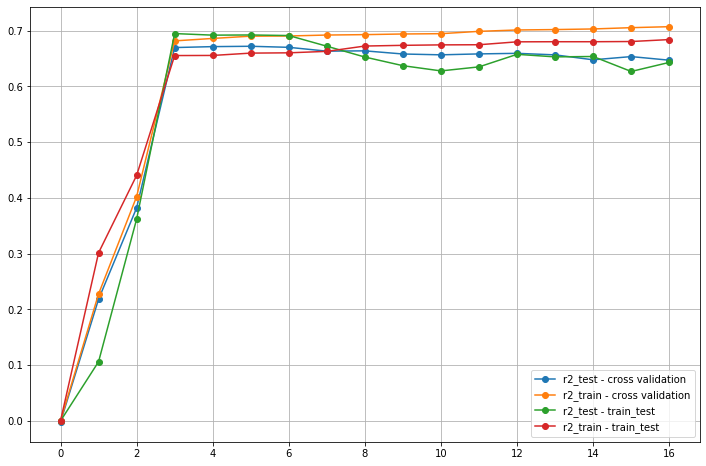

In [186]:
# Для способов 1 и 2

# Ваш код
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(res_df.index,res_df.r2_test,"o-",label = "r2_test - cross validation")
plt.plot(res_df.index,res_df.r2_train,"o-",label = "r2_train - cross validation")
plt.plot(classic_df.index,classic_df.r2_test,"o-",label = "r2_test - train_test")
plt.plot(classic_df.index,classic_df.r2_train,"o-",label = "r2_train - train_test")
plt.legend(loc="best")

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [187]:
# Для способов 1 и 2

# Ваш код

# 3 степень полиномиальной регрессии является оптимальной по качеству регресси и не сильно усложненной
models = [classic(3,True)[1],cross_val(3,True)[2]]
for i in models:
    i.fit(modify(x_train_init,3),y_train_init)

#### Повторное обучение не было произведено, так как его выполнение приводит к одинаковым результатам

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [188]:
# Для способов 1 и 2

# Ваш код
print(mean_squared_error(y_val,models[0].predict(modify(x_val,3)))," for train test")
print(mean_squared_error(y_val,models[1].predict(modify(x_val,3)))," for cross_val")

0.22272848534542528  for train test
0.22272848534542528  for cross_val


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

In [189]:
# Для способов 1 и 2

# Ваш код
axisx = np.linspace(x.min(),x.max(),60).reshape(-1,1)
axisy = [models[i].predict(modify(axisx,3)) for i in range(2)]

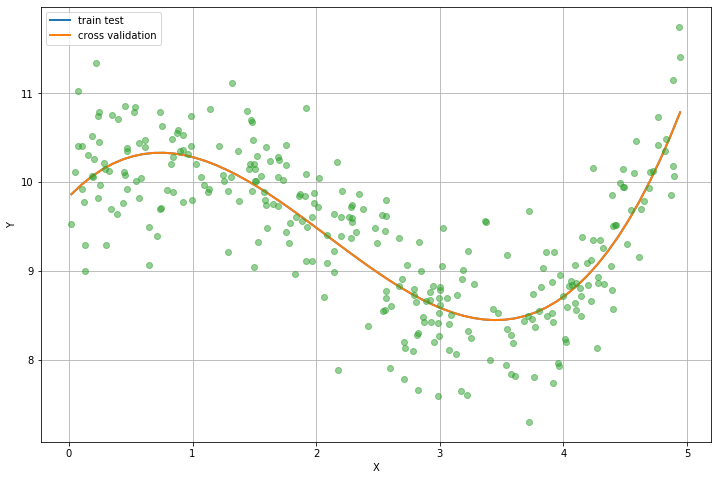

In [190]:
plt.figure(figsize=(12,8))
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(axisx,axisy[0],linewidth=2,label = "train test")
plt.plot(axisx,axisy[1],linewidth=2,label = "cross validation")
plt.legend(loc="best")
plt.plot(x, y, "o",alpha = 0.5)
plt.grid(True)
plt.show()

<p>9. Сравнение результатов для различных способов</p>

####  На графике можно увидеть, что модели, полученные в результате дообучения, показала одинаковый результат

P.s В ходе работы из за разницы терминологий были иначе использованы тестовый сет и валидационный - а именно как валидационный и тестовый

<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

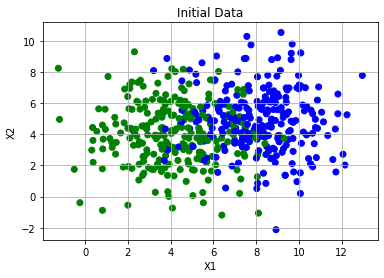

In [18]:
df = pd.read_csv("data/A2_Model_Selection/Cl_A5_V"+str(variant)+".csv")  # variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()
x = np.hstack((df.X1.values.reshape(-1,1), df.X2.values.reshape(-1,1)))
y = df.Y

In [40]:
PolynomialFeatures(3).fit_transform(x_train),x.shape

(array([[  1.        ,   8.36334549,   5.54898514, ..., 388.12680543,
         257.51774559, 170.86011161],
        [  1.        ,   6.82354654,   5.05188343, ..., 235.21967037,
         174.14732162, 128.93177504],
        [  1.        ,   5.36199202,   2.59256478, ...,  74.53872204,
          36.04005095,  17.42564451],
        ...,
        [  1.        ,   2.18894472,   7.35237085, ...,  35.22873041,
         118.32856643, 397.44973687],
        [  1.        ,  10.17542747,   5.87760253, ..., 608.56299381,
         351.52246912, 203.04889971],
        [  1.        ,   3.85738158,   1.36132183, ...,  20.255642  ,
           7.14848842,   2.52279768]]),
 (500, 2))

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [99]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

# Ваш код
def modify(data,degree):
    return PolynomialFeatures(degree).fit_transform(data)

def getmodel(degree,x,y,model,max_iter,modify_to_degree=False):
    mod1 = model(penalty="l2", fit_intercept=True,max_iter=max_iter, solver="lbfgs", random_state=12345)
#     print("MI",max_iter)
#     print(PolynomialFeatures(degree).fit_transform(x))
    mod1.fit(PolynomialFeatures(degree).fit_transform(x), y)
    return mod1

def cross_val(degree,init=False,max_iter=100):
    res = []
    model = None
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        model = getmodel(degree,X_train,Y_train,LogisticRegression,max_iter)
        acc_test = accuracy_score(Y_test,model.predict(modify(X_test,degree)))
        acc_train = accuracy_score(Y_train,model.predict(modify(X_train,degree)))
        res.append([acc_test,acc_train])
    return np.mean(res,axis=0).tolist(),model

def classic(degree,init=False,max_iter=100):
#     print(max_iter)
    res = []
    model = getmodel(degree,x_train,y_train,LogisticRegression,max_iter)
#     print(x_train.shape)
    acc_val = accuracy_score(y_val,model.predict(modify(x_val,degree)))
    acc_train  = accuracy_score(y_train,model.predict(modify(x_train,degree)))
    return [acc_val,acc_train],model

<p>3. Обучение</p>

In [100]:
# Параметры классификатора
# penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="lbfgs", random_state=12345

# Для способов 1 и 2

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

# Ваш код
classic_val_res = []
for i in range(1,14):
    classic_val_res.append(classic(i)[0])
    

classic_df = pd.DataFrame(classic_val_res,columns=["acc_test","acc_train"])
classic_df



/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

,acc_test,acc_train
0,0.852273,0.847328
1,0.840909,0.847328
2,0.852273,0.858779
3,0.818182,0.854962
4,0.806818,0.847328
5,0.806818,0.854962
6,0.772727,0.809160
7,0.704545,0.770992
8,0.704545,0.740458
9,0.715909,0.759542


In [105]:
cross_val_res = []
for i in range(1,14):
    cross_val_res.append(cross_val(i)[0])
res_df = pd.DataFrame(cross_val_res,columns=["acc_test","acc_train"])
res_df

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

,acc_test,acc_train
0,0.854,0.855333
1,0.856,0.854000
2,0.858,0.856000
3,0.852,0.859333
4,0.840,0.856667
5,0.834,0.842000
6,0.798,0.824667
7,0.784,0.799333
8,0.766,0.791333
9,0.750,0.764667


<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

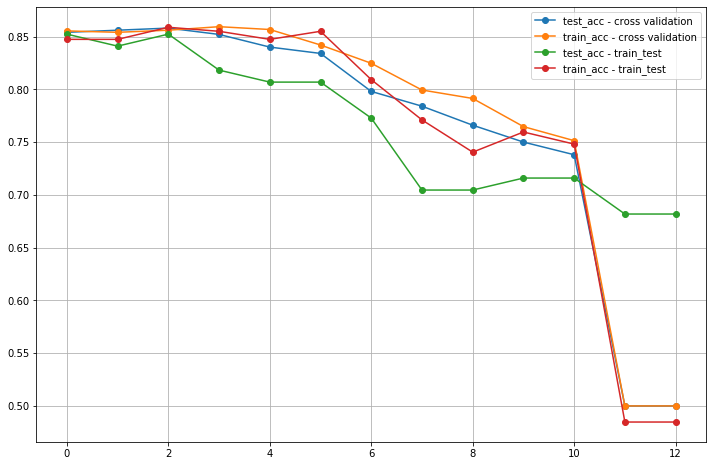

In [74]:
# Для способов 1 и 2

# Ваш код
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(res_df.index,res_df.acc_test,"o-",label = "test_acc - cross validation")
plt.plot(res_df.index,res_df.acc_train,"o-",label = "train_acc - cross validation")
plt.plot(classic_df.index,classic_df.acc_test,"o-",label = "test_acc - train_test")
plt.plot(classic_df.index,classic_df.acc_train,"o-",label = "train_acc - train_test")
plt.legend(loc="best")

<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


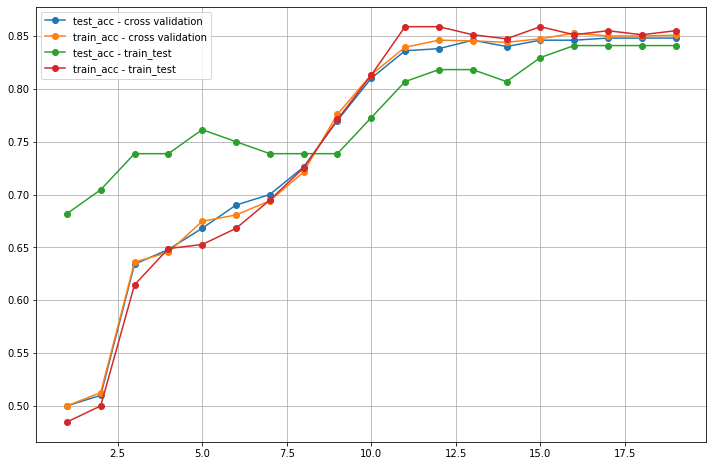

In [103]:
# Для способов 1 и 2

# Ваш код
classic_val_res = []
for i in range(1,20,1):
    classic_val_res.append([i]+classic(2,max_iter = i)[0])
classic_val_res
classic_df = pd.DataFrame(classic_val_res,columns=["iter","acc_test","acc_train"])
# classic_df

cross_val_res = []
for i in range(1,20,1):
    cross_val_res.append([i]+cross_val(2,max_iter=i)[0])
res_df = pd.DataFrame(cross_val_res,columns=["iter","acc_test","acc_train"])
res_df





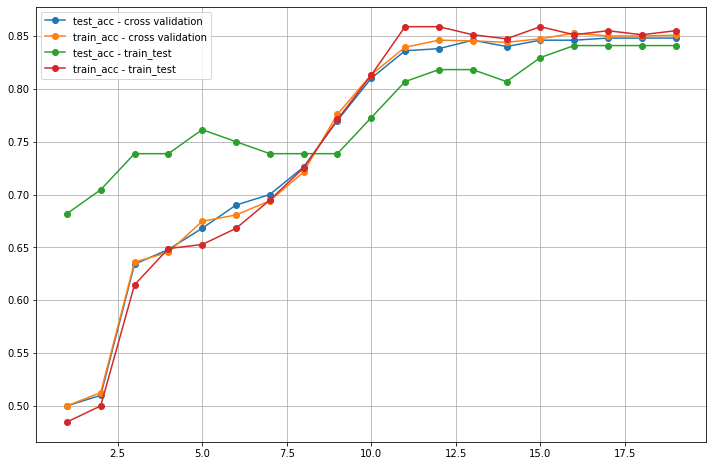

In [104]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(res_df.iter,res_df.acc_test,"o-",label = "test_acc - cross validation")
plt.plot(res_df.iter,res_df.acc_train,"o-",label = "train_acc - cross validation")
plt.plot(classic_df.iter,classic_df.acc_test,"o-",label = "test_acc - train_test")
plt.plot(classic_df.iter,classic_df.acc_train,"o-",label = "train_acc - train_test")
plt.legend(loc="best")

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [109]:
# Для способов 1 и 2

# Ваш код
out = []
for i in [cross_val(2,max_iter=5)[1],classic(2,max_iter=5)[1]]:
    i.fit(modify(x_train_init,2),y_train_init)
    out.append(accuracy_score(y_test,i.predict(modify(x_test,2))))
print("cross val score is " ,out[0], " split score is ", out[1])

cross val score is  0.6266666666666667  split score is  0.6266666666666667


/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/bulat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

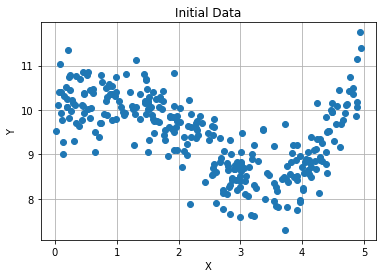

In [159]:
df = pd.read_csv("data/A2_Model_Selection/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()
x = x.reshape(-1,1)

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [160]:
# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

# Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

# Для каждого значения коэф. регуляризации:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

# Ваш код
from sklearn.linear_model import Ridge
def modify(data,degree):
    return PolynomialFeatures(degree).fit_transform(data)

def getmodel(degree,x,y,model,alpha,modify_to_degree=False):
    mod1 = model(fit_intercept=True,alpha=alpha, normalize=True, random_state=12345)
    mod1.fit(PolynomialFeatures(degree).fit_transform(x), y)
    return mod1

def cross_val(degree,alpha,init=False):
    res = []
    model = None
#     print(x.shape)
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
#         print(X_train.shape)
        model = getmodel(degree,X_train,Y_train,Ridge,alpha)
        mse_test = mean_squared_error(Y_test,model.predict(modify(X_test,degree)))
        mse_train = mean_squared_error(Y_train,model.predict(modify(X_train,degree)))
        r2_test = r2_score(Y_test,model.predict(modify(X_test,degree)))
        r2_train = r2_score(Y_train,model.predict(modify(X_train,degree)))
        res.append((mse_test,mse_train,r2_test,r2_train,alpha))
    return np.mean(res,axis=0).tolist(),(np.std(res,axis=0)[0]),model

<p>3. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

In [161]:
# коэффицикета регуляризации?
# задание на зависимости среднеквадратической ошибки от степени полинома для обучающего
# и проверочного было в начале нуотбука
# Ваш код
cross_val_res = []
for i in alphas:
    cross_val_res.append(list(cross_val(16,i)[0])+[cross_val(16,i)[1]])
    
res_df = pd.DataFrame(cross_val_res,columns=["mse_test","mse_train","r2_test","r2_train","alpha",'std'])
res_df

,mse_test,mse_train,r2_test,r2_train,alpha,std
0,0.253536,0.211248,0.647142,0.707264,0.000000e+00,0.026103
1,0.240577,0.220775,0.664957,0.694074,1.000000e-08,0.020545
2,0.240937,0.221554,0.664457,0.692998,2.976351e-08,0.020577
3,0.240840,0.222017,0.664578,0.692358,8.858668e-08,0.020662
4,0.240504,0.222336,0.665025,0.691916,2.636651e-07,0.020786
5,0.239993,0.222565,0.665708,0.691597,7.847600e-07,0.020914
6,0.239252,0.222774,0.666708,0.691305,2.335721e-06,0.020993
7,0.238374,0.223022,0.667922,0.690959,6.951928e-06,0.020737
8,0.237322,0.223273,0.669427,0.690611,2.069138e-05,0.019835
9,0.236193,0.223604,0.671064,0.690155,6.158482e-05,0.018696


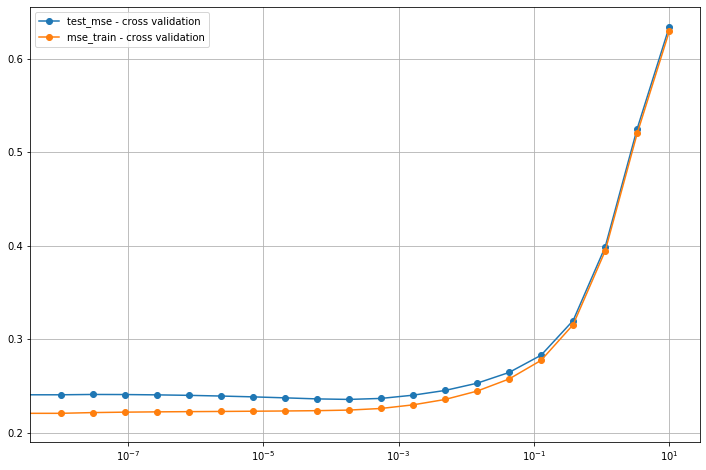

In [133]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xscale("log")
plt.plot(res_df.alpha,res_df.mse_test,"o-",label = "test_mse - cross validation")
plt.plot(res_df.alpha,res_df.mse_train,"o-",label = "mse_train - cross validation")

plt.legend(loc="best")

<p>4. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

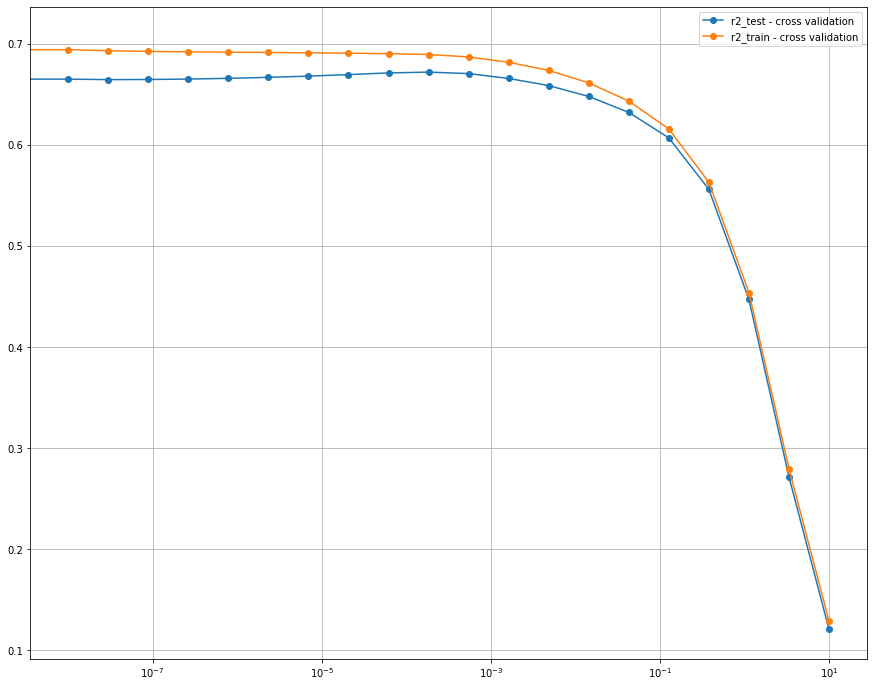

In [162]:
# Ваш код
plt.figure(figsize=(15,12))
plt.grid()
plt.xscale("log")
plt.plot(res_df.alpha,res_df.r2_test,"o-",label = "r2_test - cross validation")
plt.plot(res_df.alpha,res_df.r2_train,"o-",label = "r2_train - cross validation")

plt.legend(loc="best")

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [163]:
# Ваш код
res_df.loc[res_df.mse_test.idxmin()]

mse_test     0.235637
mse_train    0.224229
r2_test      0.671882
r2_train     0.689295
alpha        0.000183
std          0.018411
Name: 10, dtype: float64

<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [168]:
# Ваш код
x_train_init, x_test, y_train_init, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

model = cross_val(16,0.000183)[2].fit(modify(x_train_init,16),y_train_init)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [169]:
# Ваш код
mean_squared_error(y_test,model.predict(modify(x_test,16)))

0.21842935506029065

<p>10. Построить график регрессии</p>

In [174]:
# Для способов 1 и 2

# Ваш код
axisx = np.linspace(x.min(),x.max(),60).reshape(-1,1)
axisy = model.predict(modify(axisx,16))

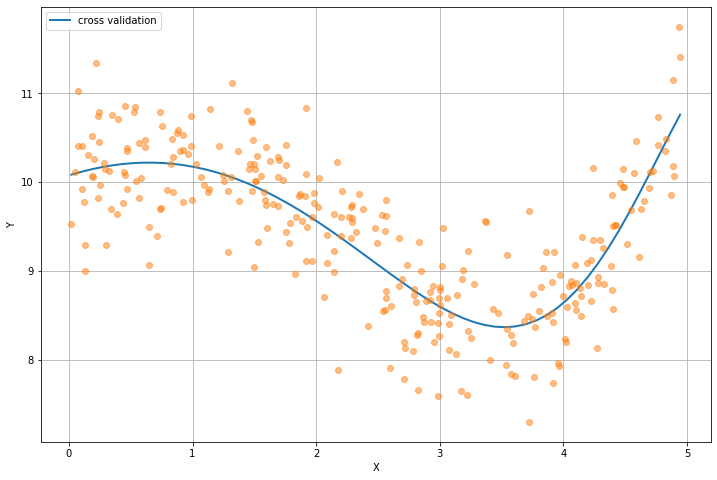

In [175]:
plt.figure(figsize=(12,8))
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(axisx,axisy,linewidth=2,label = "cross validation")
plt.legend(loc="best")
plt.plot(x, y, "o",alpha = 0.5)
plt.grid(True)
plt.show()

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

#### Лассо регуляризация улучшила показатель среднеквадратичной ошибки